In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

# For predictions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [3]:
# Snap ML is available on PyPI. To install it simply run the pip command below.
!pip install snapml


ERROR: Could not find a version that satisfies the requirement snapml (from versions: none)
ERROR: No matching distribution found for snapml


## Creating a model that can precisely identify fraudulent credit card transactions is the project's goal.
# The issue is serious because false positive fraud detections can put customers through hassle while false negatives can cost the credit card business money.

In [4]:
df = pd.read_csv("/Users/mohitgupta/Documents/RESUME PROJECTS/creditcard.csv")
df.shape

(284807, 31)

# ..........................................EDA

In [5]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [6]:
df.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print("Description of the dataset:" )
df.describe().T

Description of the dataset:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.duplicated().sum()

1081

In [29]:
df.drop_duplicates(keep=False,inplace=True)

In [14]:
missing_values = df.isna().sum().max()
print(missing_values)

0


In [32]:
# Check if there are still any NaN or infinite values
print(np.sum(np.isnan(df)))
print(np.sum(np.isfinite(df)))

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      282953
V1        282953
V2        282953
V3        282953
V4        282953
V5        282953
V6        282953
V7        282953
V8        282953
V9        282953
V10       282953
V11       282953
V12       282953
V13       282953
V14       282953
V15       282953
V16       282953
V17       282953
V18       282953
V19       282953
V20       282953
V21       282953
V22       282953
V23       282953
V24       282953
V25       282953
V26       282953
V27       282953
V28       282953
Amount    282953
Class     282953
dtype: int64


In [16]:
amount = df.groupby('Class')['Amount'].sum()
fraud, unfraud = len(df[df['Class'] == 1]), len(df[df['Class'] == 0])
fraud_perc, unfraud_perc = (fraud/len(df)) * 100 , (unfraud/len(df))*100

Loss = pd.DataFrame({'Fraud' : ['Fraud', 'No Fraud'], 'Total Amount' : [amount[1], amount[0]], 
                     'Freq.' : [fraud, unfraud],'% Perc.' : [fraud_perc, unfraud_perc]})
Loss = Loss.set_index('Fraud')
Loss

,Total Amount,Freq.,% Perc.
Fraud,,,
Fraud,60127.97,492,0.172749
No Fraud,25102462.04,284315,99.827251


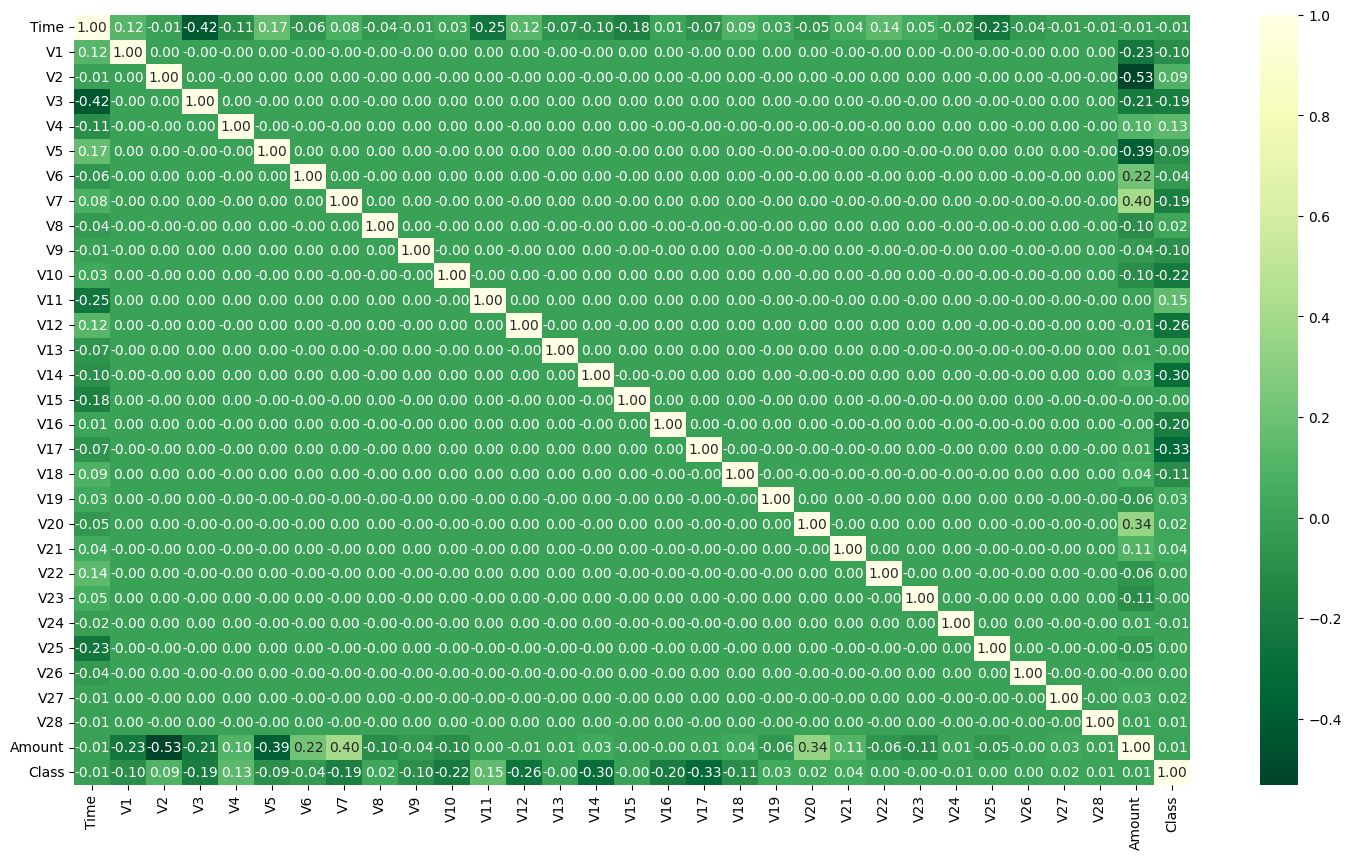

In [17]:
# check the correlation
fig = plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), cmap='YlGn_r', annot = True, fmt = ".2f")
plt.show()

In [18]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [19]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

4432 outliers in 'V1'
8960 outliers in 'V2'
1816 outliers in 'V3'
4736 outliers in 'V4'
6037 outliers in 'V5'
19016 outliers in 'V6'
5809 outliers in 'V7'
17311 outliers in 'V8'
2969 outliers in 'V9'
5766 outliers in 'V10'
334 outliers in 'V11'
8259 outliers in 'V12'
401 outliers in 'V13'
7069 outliers in 'V14'
565 outliers in 'V15'
2865 outliers in 'V16'
3957 outliers in 'V17'
1752 outliers in 'V18'
4466 outliers in 'V19'
20808 outliers in 'V20'
11156 outliers in 'V21'
614 outliers in 'V22'
13267 outliers in 'V23'
446 outliers in 'V24'
2219 outliers in 'V25'
1247 outliers in 'V26'
27710 outliers in 'V27'
21280 outliers in 'V28'
26132 outliers in 'Amount'

231399 OUTLIERS TOTALLY


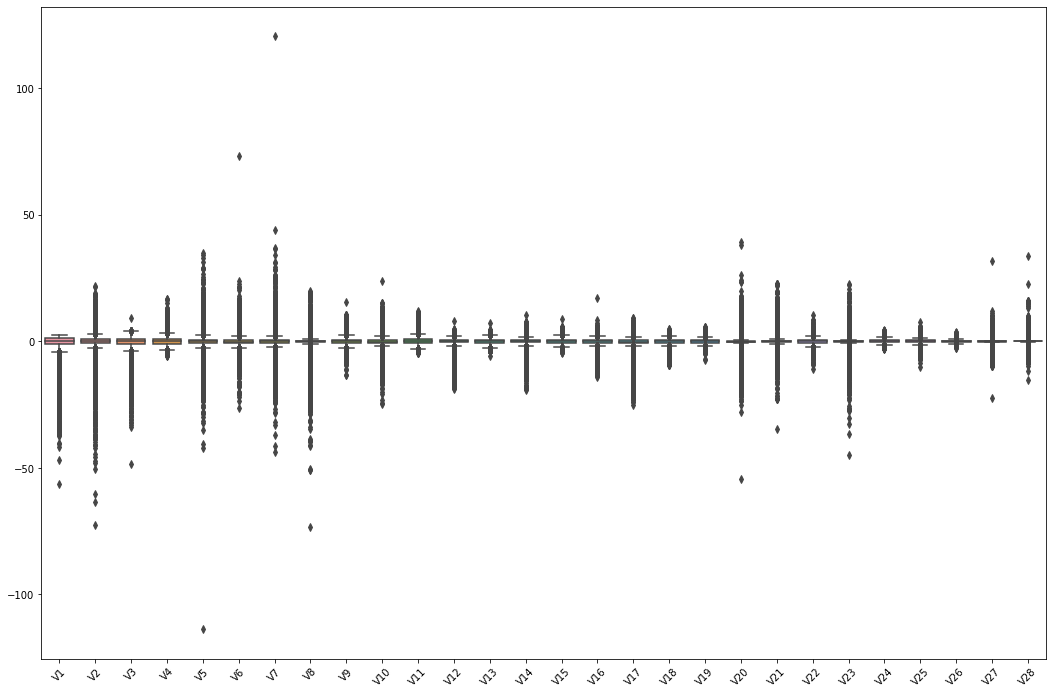

In [37]:
plt.figure(figsize=(18,12))
sns.boxplot(data = df.loc[:,(df.columns != 'Time') & (df.columns != 'Amount')& (df.columns != 'Class')])
plt.xticks(rotation=45);

In [38]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  282493
Number of Fraud transactions:  460
Percentage of Fraud transactions: 0.1626


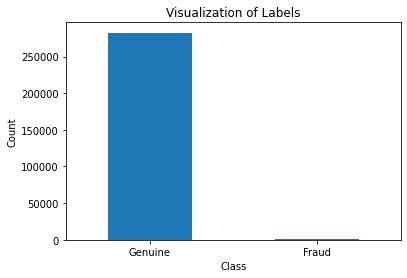

In [39]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

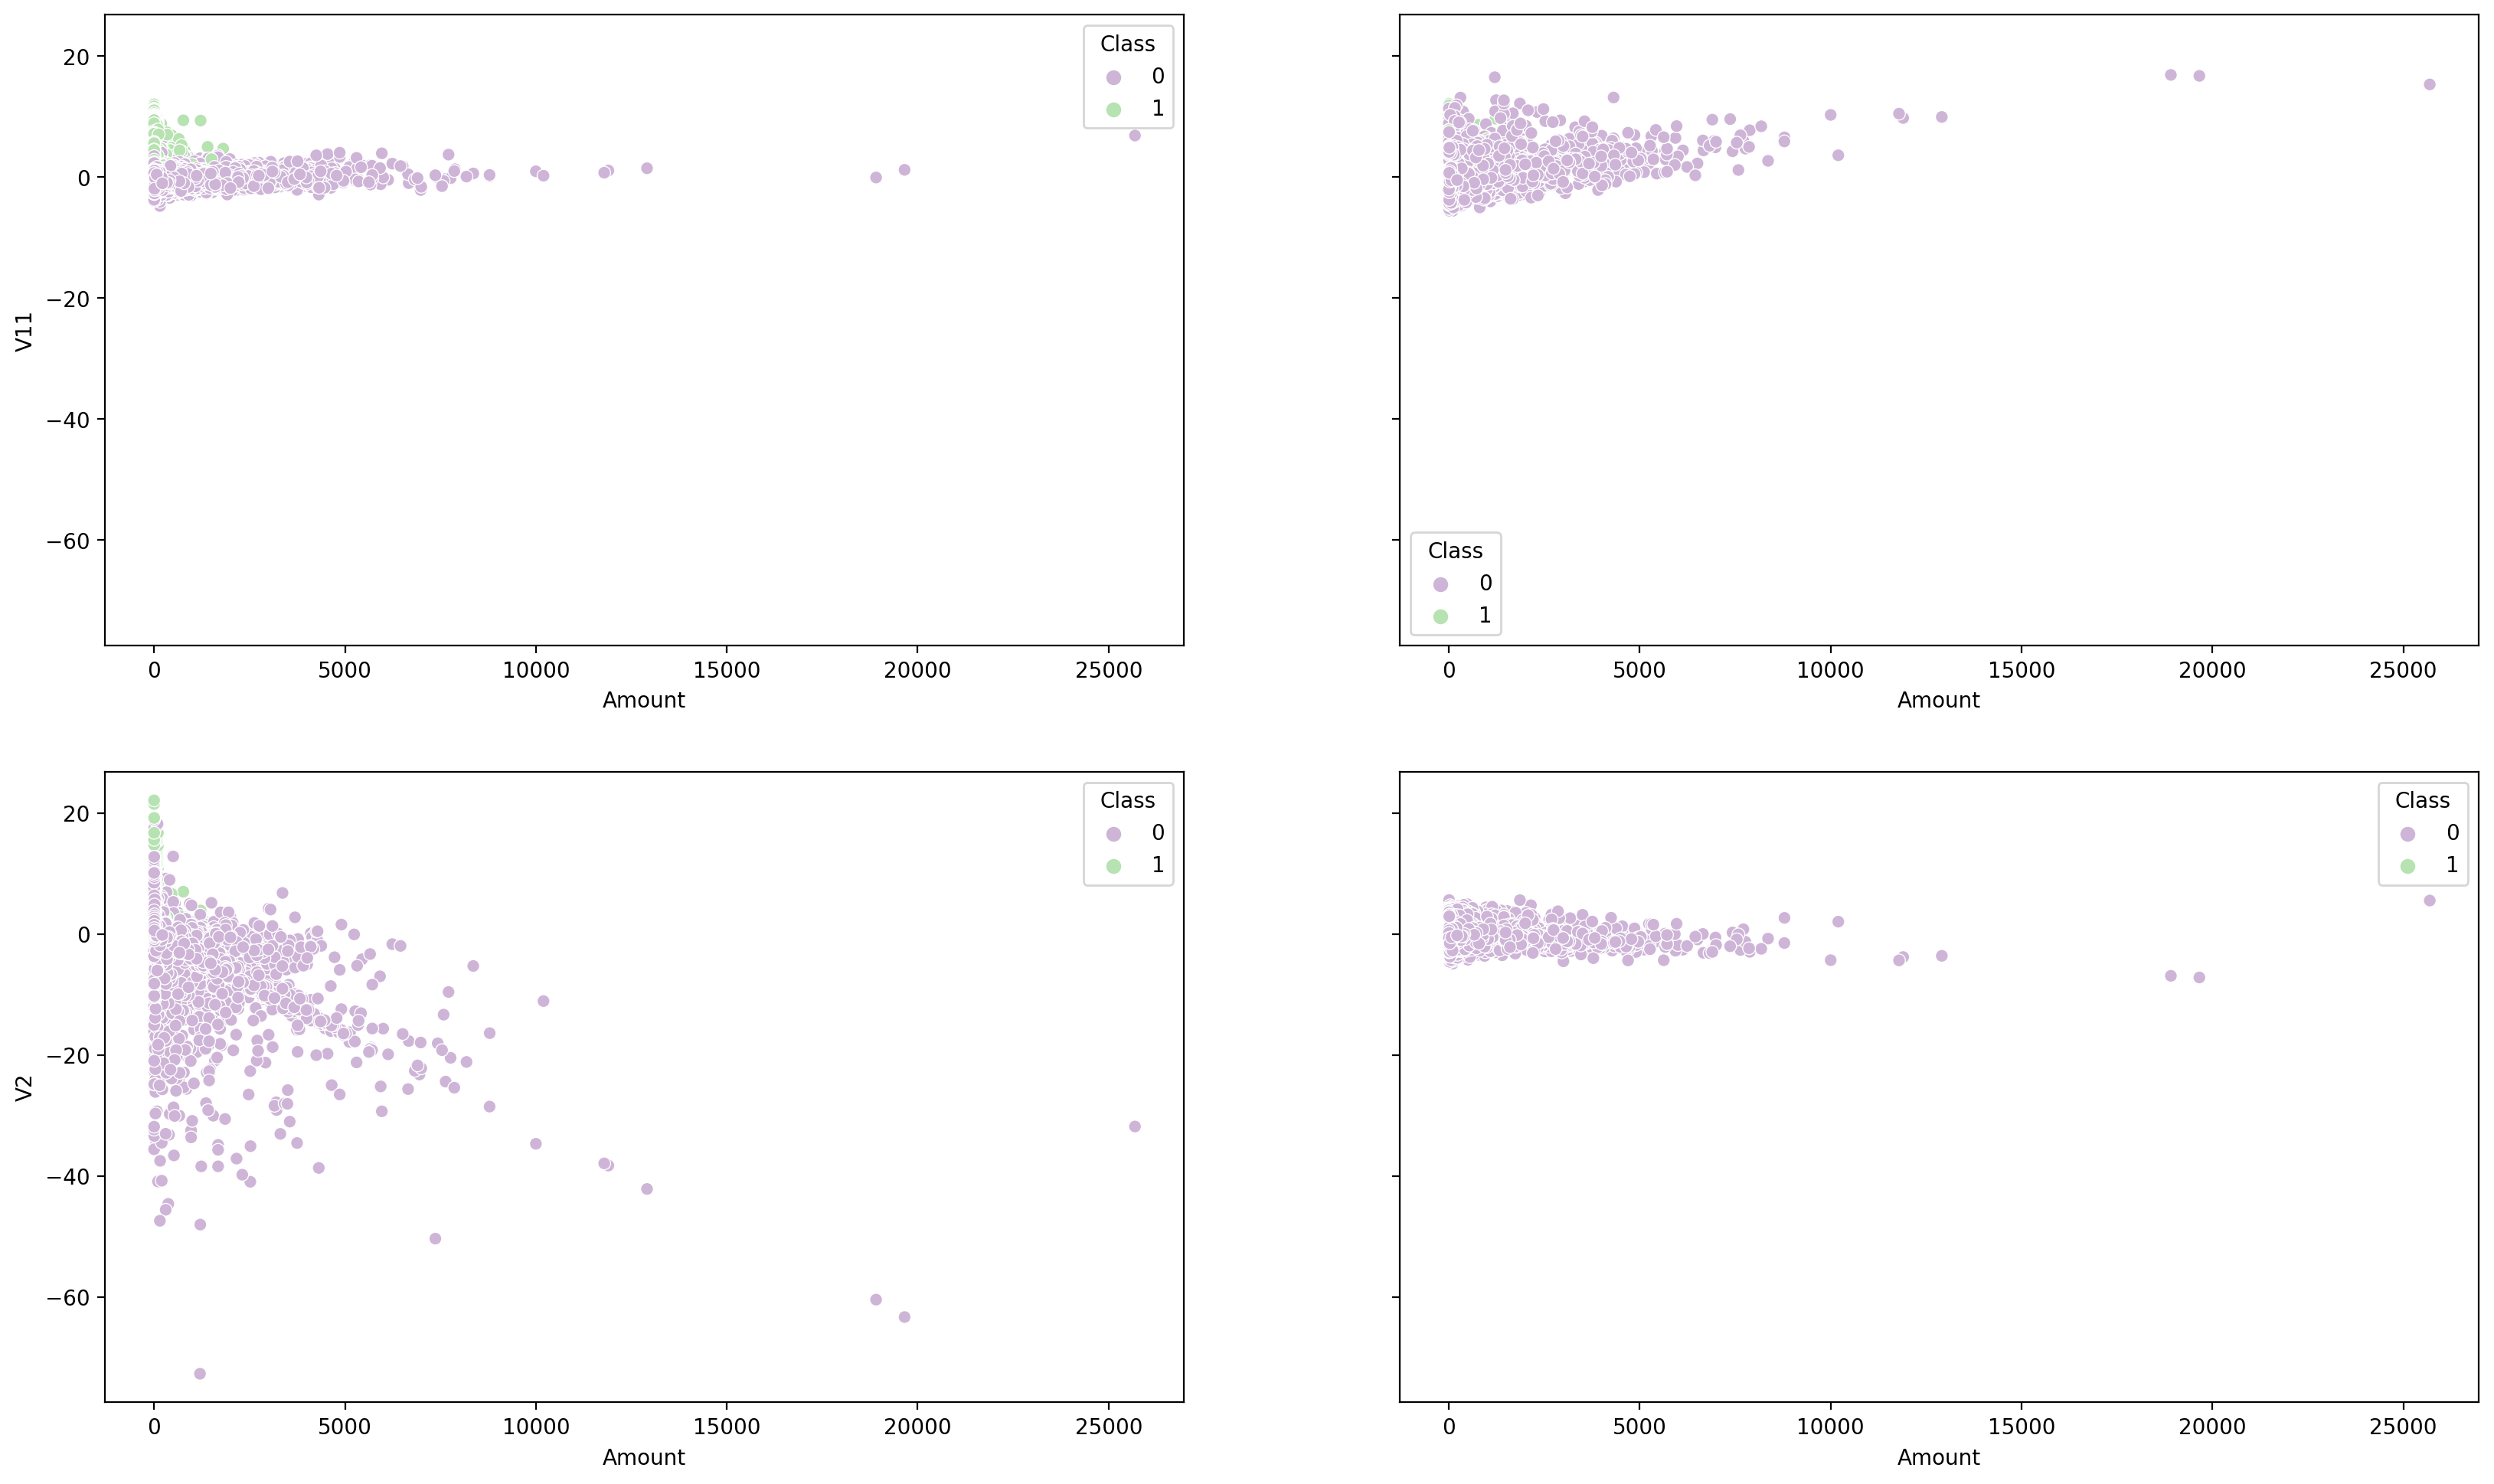

In [40]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

#  ................................................Modeling 

In [49]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Assign X to input_data and y to target_data
input_data = X
target_data = y

In [50]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', Y_train.shape)
print(' x_test.shape=', x_test.shape, 'y_test.shape=', y_test.shape)

X_train.shape= (226362, 30) Y_train.shape= (226362,)
 x_test.shape= (56591, 30) y_test.shape= (56591,)


# Model Building with dataset that will be used for testing is 20 percent.

In [51]:
print('Test shape:\t', x_test.shape)
print('Train shape:\t', X_train.shape)
print('Target Dataset shape:\t', target_data.shape)

Test shape:	 (56591, 30)
Train shape:	 (226362, 30)
Target Dataset shape:	 (282953,)


# Model Building with dataset that will be used for testing is 30 percent.

In [52]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix



In [54]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []

models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []

In [55]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score train
0,RF,0.999423,1.000000,0.761006,1.000000,0.831615,1.000000
1,GBC,0.999058,0.999313,0.716981,0.744186,0.740260,0.767123
2,LR,0.999128,0.999318,0.641509,0.631229,0.733813,0.737864
3,SVM,0.999116,0.999748,0.591195,0.843854,0.714829,0.910394
4,ADA,0.999010,0.999313,0.635220,0.704319,0.706294,0.757143
